In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
/content/utils.py

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
# from algorithms.tensor_coclust_tau import CoClust
# from sklearn.metrics import adjusted_rand_score as ari
# from sklearn.metrics import normalized_mutual_info_score as nmi
# from sklearn.metrics import accuracy_score
# from utils import CreateOutputFile, CreateLogger


In [ ]:
predicted_ratings = pd.read_csv('/content/costco_result_20.csv',header=None)

In [ ]:
# n, m, l = shape
# T = np.zeros((n, m, l))


In [ ]:
final = np.loadtxt("/content/movie_data.txt").astype(int)

In [ ]:
for row in final:
    T[row[0] - 1, row[1] - 1, row[2]] = row[3]

In [ ]:
y = predicted_ratings[0].to_numpy()

In [ ]:
final_cut = final[:100]

num_rows_to_select = 100

# Generate random indices
random_indices = np.random.choice(final.shape[0], num_rows_to_select, replace=False)

# Select the rows using the randomly generated indices
final_cut = final[random_indices]

final_cut.shape

(100, 3)

In [ ]:
predicted_ratings_cut = y[random_indices]

In [ ]:
n_cut, m_cut, l_cut = 0, 0, 0
for i in final_cut:
    n_cut = max(n_cut, i[0])
    m_cut = max(m_cut, i[1])
    l_cut = max(l_cut, i[2])


In [ ]:
T_cut = np.zeros((n_cut, m_cut, l_cut + 1))

In [ ]:
T_cut.shape

(517, 8441, 10)

In [ ]:

for row in final_cut:
    T_cut[row[0] - 1, row[1] - 1, row[2]] = 1

CoClust

In [ ]:
alg = 'ALT2'
output_path = f"./output/MovieLens/"
directory = os.path.dirname(output_path)
if not os.path.exists(directory):
    os.makedirs(directory)

model = CoClust(n_iterations = 50, optimization_strategy = alg, path = output_path)
model.fit(T_cut)

tau = model.final_tau_
n = nmi(model._assignment[1], predicted_ratings_cut, average_method='arithmetic')
a = ari(model._assignment[1], predicted_ratings_cut)
acc = accuracy_score(model._assignment[1], predicted_ratings_cut)

print(acc)

Tucker

In [ ]:
final = np.loadtxt("/content/join_movie_data.csv").astype(int)

In [ ]:
final_cut = final[:100]

num_rows_to_select = 100

# Generate random indices
random_indices = np.random.choice(final.shape[0]//10, num_rows_to_select, replace=False)

# Select the rows using the randomly generated indices
final_cut = final[random_indices]

final_cut.shape

(100, 4)

In [ ]:
n_cut, m_cut, l_cut = 0, 0, 0
for i in final:
    n_cut = max(int(n_cut), i[0])
    m_cut = max(int(m_cut), i[1])
    l_cut = max(int(l_cut), i[2])


In [ ]:
T_cut = np.zeros((n_cut, m_cut, l_cut + 1))

In [ ]:
T_cut.shape

(610, 9052, 10)

In [ ]:
for row in final:
    T_cut[row[0] - 1, row[1] - 1, row[2]] = row[3]

In [ ]:
!pip install tensorly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tensorly as tl
from tensorly.decomposition import tucker

data = tl.tensor(T_cut)
rank = [4, 5, 2]  # Different ranks for each mode

core, factors = tucker(data, rank=rank)

In [ ]:
reconstructed_data = tl.tucker_to_tensor((core, factors))

In [ ]:
from tensorly import norm

error = 1 - norm(data - reconstructed_data) / norm(data)
print(error)

0.07545024633559294


[6, 7, 10]
[6, 8, 10]
[6, 9, 10]
[6, 10, 6]
[6, 10, 7]
[6, 10, 8]
[6, 10, 9]
[6, 10, 10]
[7, 6, 10]
[7, 7, 10]
[7, 8, 10]
[7, 9, 10]
[7, 10, 6]
[7, 10, 7]
[7, 10, 8]
[7, 10, 9]
[7, 10, 10]
[8, 6, 10]
[8, 7, 10]
[8, 8, 10]
[8, 9, 10]
[8, 10, 6]
[8, 10, 7]
[8, 10, 8]
[8, 10, 9]
[8, 10, 10]
[9, 6, 10]
[9, 7, 10]
[9, 8, 10]
[9, 9, 10]
[9, 10, 6]
[9, 10, 7]
[9, 10, 8]
[9, 10, 9]
[9, 10, 10]
[10, 6, 6]
[10, 6, 7]
[10, 6, 8]
[10, 6, 9]
[10, 6, 10]
[10, 7, 6]
[10, 7, 7]
[10, 7, 8]
[10, 7, 9]
[10, 7, 10]
[10, 8, 6]
[10, 8, 7]
[10, 8, 8]
[10, 8, 9]
[10, 8, 10]
[10, 9, 6]
[10, 9, 7]
[10, 9, 8]
[10, 9, 9]
[10, 9, 10]
[10, 10, 6]
[10, 10, 7]
[10, 10, 8]
[10, 10, 9]
[10, 10, 10]


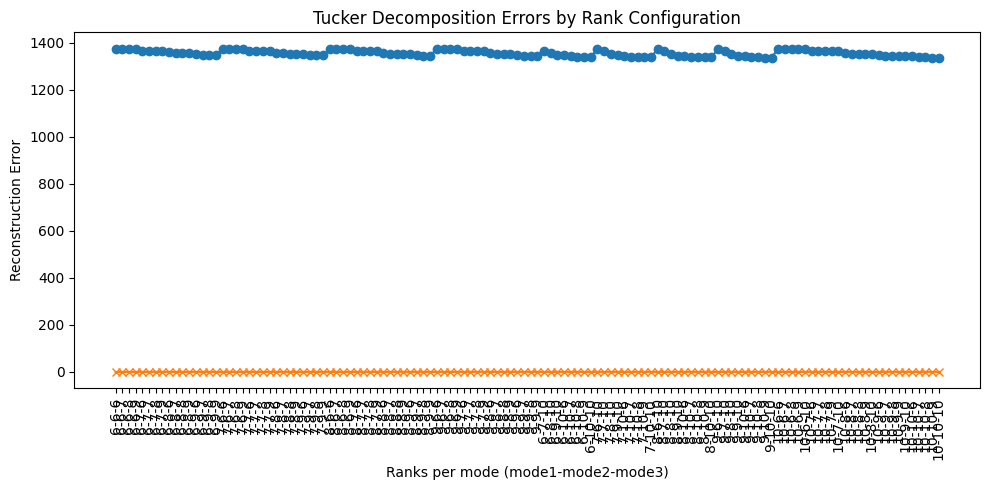

In [ ]:
rank_ranges = {
    'mode1': range(6, 11),  # e.g., range from 1 to 5 for the first mode
    'mode2': range(6, 11),
    'mode3': range(6, 11)
}

# Record the errors for each combination of ranks
# errors = []
# labels = []
# variance = []

for r1 in rank_ranges['mode1']:
    for r2 in rank_ranges['mode2']:
        for r3 in rank_ranges['mode3']:
            rank = [r1, r2, r3]
            if rank not in seen:
              print(rank)
              seen.append(rank)
              core, factors = tucker(data, rank=rank)
              reconstructed = tl.tucker_to_tensor((core, factors))
              reconstruction_error = norm(data - reconstructed)
              explained_variance = 1 - (norm(data - reconstructed) / norm(data))
              variance.append(explained_variance)
              errors.append(reconstruction_error)
              labels.append(f"{r1}-{r2}-{r3}")

import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(labels, errors, marker='o')
plt.plot(labels, variance, marker='x')
plt.xticks(rotation=90)
plt.xlabel('Ranks per mode (mode1-mode2-mode3)')
plt.ylabel('Reconstruction Error')
plt.title('Tucker Decomposition Errors by Rank Configuration')
plt.tight_layout()
plt.show()

In [ ]:
combine = []
combine.append(labels)
combine.append(errors)
combine.append(variance)

In [ ]:
import csv

# Specify the file name
filename = "data.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write each row of the 2D list to the CSV
    for row in combine:
        writer.writerow(row)

In [ ]:
print(min(errors))
print(min(variance))

1335.6336887455557
0.10784602339053939


In [ ]:
variance.index(min(variance))

0

In [ ]:
seen = []
for i in range(6,10):
  for j in range(6,10):
    for k in range(6,10):
      seen.append([i,j,k])

In [ ]:
seen